In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from google.colab import drive
from xgboost import XGBRegressor

from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
from datetime import datetime, timedelta

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def pull():

  sales = pd.read_csv('/content/drive/MyDrive/sales_train.csv')
  return sales


items = pd.read_excel('/content/drive/MyDrive/items_in_the_shop.xlsx')

In [ ]:
sales=pull()

In [ ]:
sales.shape

(2935849, 6)

In [ ]:
items.shape

(22170, 3)

In [ ]:
items.head()

,item_name,item_id,item_category_id
0,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441,0
1,Наушники PHILIPS SBC HC8680,16255,0
2,Наушники RITMIX RH-120,16256,0
3,Наушники RITMIX RH-124 Black,16257,0
4,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606,1


In [ ]:
sales_c = sales[sales['item_cnt_day'] >= 0]

sales_c.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [ ]:
sales_c.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894664e+02,1.248337e+00
std,9.422952e+00,1.622543e+01,6.324396e+03,1.727498e+03,2.619586e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
sales_c.item_cnt_day.sum()

3655747.0

In [ ]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928493 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.4+ MB


In [ ]:
sales_c["date"]= pd.to_datetime(sales_c["date"], format='%d.%m.%Y')
sales_c.sort_values(by="date", inplace=True)
sales_c.head()

<ipython-input-12-adf5d608398c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_c["date"]= pd.to_datetime(sales_c["date"], format='%d.%m.%Y')
<ipython-input-12-adf5d608398c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_c.sort_values(by="date", inplace=True)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
28804,2013-01-01,0,27,2678,999.00,1.0
93016,2013-01-01,0,42,13831,398.36,1.0
54261,2013-01-01,0,8,18450,199.00,1.0
100504,2013-01-01,0,51,18201,219.00,1.0
114730,2013-01-01,0,46,5272,599.00,2.0


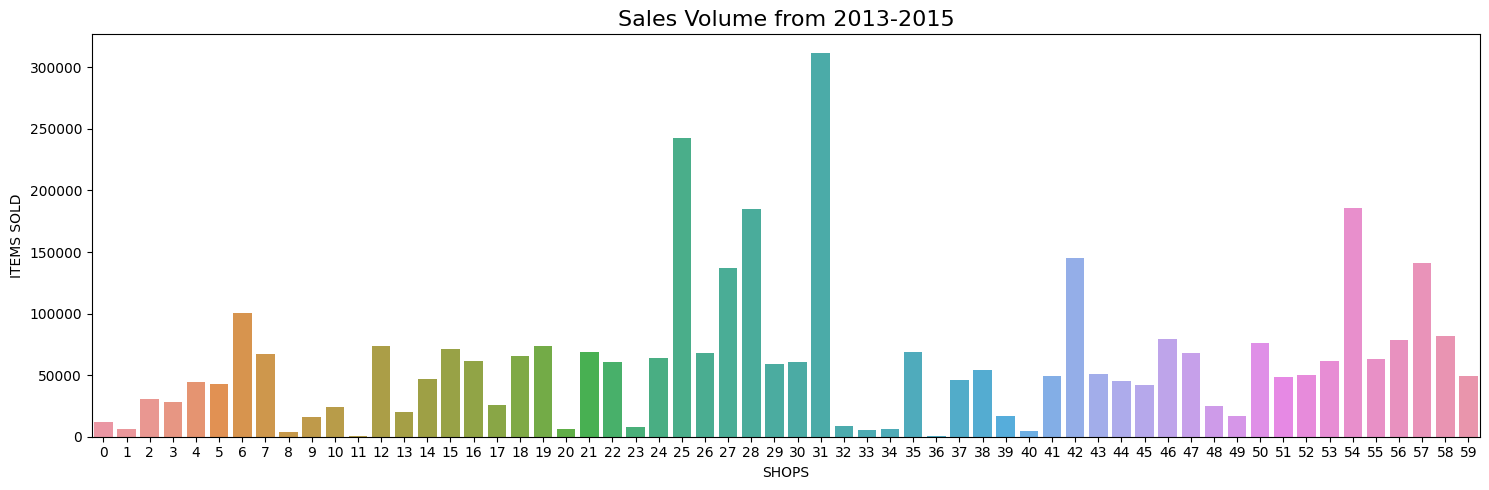

In [ ]:

sales_group = sales_c.groupby('shop_id', as_index=False)['item_cnt_day'].sum()

def sales_volume():
  plt.figure(figsize=(15,5))
  sns.barplot(x="shop_id",y="item_cnt_day", data=sales_group)
  plt.title('Sales Volume from 2013-2015', size=16)
  plt.xlabel('SHOPS'), plt.ylabel('ITEMS SOLD')

  plt.tight_layout()
  plt.show()
  return


sales_volume()

In [ ]:
sales_merging = sales_c.merge(items, on='item_id', how='left' )

sales_merging.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
2928488,2015-10-31,33,55,6089,399.0,1.0,"Rayman Legends. Русская версия.[PC, Цифровая в...",31
2928489,2015-10-31,33,21,4261,299.0,1.0,"King's Bounty: Темная сторона [PC, Jewel, русс...",30
2928490,2015-10-31,33,58,21671,399.0,1.0,ЧЕРЕПАШКИ-НИНДЗЯ Сезон 2 Коллекция мультфиль...,40
2928491,2015-10-31,33,19,7863,1299.0,1.0,World of Warcraft: Warlords of Draenor (дополн...,28
2928492,2015-10-31,33,21,5838,499.0,1.0,Pokemon XY Стартовый набор Калоса,65


In [ ]:
#Category wise

sales_merging_cat = sales_merging.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
#plt.figure(figsize=(15,6))
#sns.barplot(x="item_category_id",y="item_cnt_day", data = sales_merging_cat)
#plt.title('Sales Categories', size=16)
#plt.xlabel('Item Categories ID'), plt.ylabel('Items count daily')

#plt.tight_layout()
#plt.show()
#plt.show()

In [ ]:
# Handle missing values
data = sales_merging.dropna()

data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-01,0,27,2678,999.00,1.0,Dance Central 2 - MSX Xbox 360 Russian Russia ...,23
1,2013-01-01,0,42,13831,398.36,1.0,ЛЕДИ,40
2,2013-01-01,0,8,18450,199.00,1.0,СБ. Союз 51,55
3,2013-01-01,0,51,18201,219.00,1.0,СБ. 25 лучших русских романсов 2CD,55
4,2013-01-01,0,46,5272,599.00,2.0,Need for Speed: Most Wanted (a Criterion Game)...,30


In [ ]:
data = data.drop(['item_name'], axis=1)

In [ ]:
#Feature Engineering
# Extract features from the date column

def feature_engineering():
  data['date'] = pd.to_datetime(data['date'])
  data['month'] = data['date'].dt.month
  data['year'] = data['date'].dt.year
  data['day_of_week'] = data['date'].dt.dayofweek
  data['Revenue'] = data['item_price'] *   data['item_cnt_day']
  data['day_of_year'] = data['date'].dt.dayofyear
  data['day_count'] = (data['date'] - data['date'].min()).dt.days
  return

feature_engineering()


In [ ]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,month,year,day_of_week,Revenue,day_of_year,day_count
0,2013-01-01,0,27,2678,999.00,1.0,23,1,2013,1,999.00,1,0
1,2013-01-01,0,42,13831,398.36,1.0,40,1,2013,1,398.36,1,0
2,2013-01-01,0,8,18450,199.00,1.0,55,1,2013,1,199.00,1,0
3,2013-01-01,0,51,18201,219.00,1.0,55,1,2013,1,219.00,1,0
4,2013-01-01,0,46,5272,599.00,2.0,30,1,2013,1,1198.00,1,0


In [ ]:
df = data[['day_of_year', 'shop_id', 'item_category_id', 'item_cnt_day']]


In [ ]:
shop_id_list = df['shop_id'].unique().tolist()
category_id_list = df['item_category_id'].unique().tolist()

In [ ]:
df_ = df.loc[(df['shop_id'] == 27) & (df['item_category_id'] == 23)]
df_1 = df_.groupby('day_of_year')['item_cnt_day'].sum()
df_1

day_of_year
1       48.0
2       97.0
3       93.0
4       86.0
5       60.0
       ...  
361     53.0
362    114.0
363    104.0
364     97.0
365     58.0
Name: item_cnt_day, Length: 365, dtype: float64

In [ ]:
results = {}

for shop in shop_id_list[:10]:
  for category in category_id_list[:10]:
    df_ = df.loc[(df['shop_id'] == shop) & (df['item_category_id'] == category)]
    variable_name = f'df_{shop}_{category}'
    results[variable_name] = df_.groupby("day_of_year")["item_cnt_day"].sum().reset_index()
    results[variable_name] = variable_name


In [ ]:
grouped_df = data.groupby('day_of_year').agg({
    'item_cnt_day': 'sum',
    'item_category_id': 'first',  # Since it's the same for all rows in each group
    'shop_id': 'first',           # Since it's the same for all rows in each group
            # Counting the number of rows in each group (number of sales on that day)
}).reset_index()

print(grouped_df)


     day_of_year  item_cnt_day  item_category_id  shop_id
0              1        6392.0                23       27
1              2       23606.0                23       54
2              3       21076.0                40        1
3              4       19377.0                40       25
4              5       17954.0                77       22
..           ...           ...               ...      ...
360          361       18930.0                22       19
361          362       23101.0                30       31
362          363       21481.0                37       42
363          364       26109.0                28       45
364          365       21948.0                23       57

[365 rows x 4 columns]


In [ ]:
shop_id_list[:10]

[27, 42, 8, 51, 46, 37, 54, 18, 19, 7]

In [ ]:
category_id_list[:10]

[23, 40, 55, 30, 37, 77, 28, 66, 58, 67]

Group the data by the combination of category_id and shop_id.


In [ ]:
results = {}
df_concat = pd.DataFrame()

num_components = 4

for shop in shop_id_list:
  for category in category_id_list:
    df_ = df.loc[(df['shop_id'] == shop) & (df['item_category_id'] == category)]
    variable_name = f'df_{shop}_{category}'
    df_1 = df_.groupby("day_of_year")["item_cnt_day"].sum().reset_index()
    df_1['shop_category'] = variable_name
    df_1['category'] = category
    df_1['shop'] = shop

    df_concat = pd.concat([df_concat, df_1])

df_concat.head()

,day_of_year,item_cnt_day,shop_category,category,shop
0,1,48.0,df_27_23,23,27
1,2,97.0,df_27_23,23,27
2,3,93.0,df_27_23,23,27
3,4,86.0,df_27_23,23,27
4,5,60.0,df_27_23,23,27


In [ ]:
df_concat.head()
item=df_concat['item_cnt_day'].unique


In [ ]:
category_ = df_concat['category'].unique()
shop_ = df_concat['shop'].unique()

This will create a 3d array with shop id, category id and day of year being indices, while elements of the array will contain the number of category with a particular Item ID sold in a particular shop on a particular day.

In [ ]:
def newcube():
  newcube = np.zeros((365, len(shop_id_list), len(category_id_list)))
  for i in range(len(df_concat)):
    shop_id = df_concat['shop'].iloc[i]
    category_id = df_concat['category'].iloc[i]
    day_of_year_ = df_concat['day_of_year'].iloc[i]
    newcube[day_of_year_ - 1, shop_id, category_id] +=  df_concat['item_cnt_day'].iloc[i]
    return

newcube=newcube()

In [ ]:

  newcube = np.zeros((365, len(shop_id_list), len(category_id_list)))
  for i in range(len(df_concat)):
    shop_id = df_concat['shop'].iloc[i]
    category_id = df_concat['category'].iloc[i]
    day_of_year_ = df_concat['day_of_year'].iloc[i]
    newcube[day_of_year_ - 1, shop_id, category_id] +=  df_concat['item_cnt_day'].iloc[i]




In [ ]:
# Calculate the total number of products sold every day
total_products_sold = np.sum(newcube, axis=(1, 2))
#total_products_sold = np.sum(newcube, axis=1)


# Print the resulting array
print(total_products_sold)


[ 6392. 23606. 21076. 19377. 17954. 16324. 14492. 13580. 10230. 10928.
 12302. 11583.  9453.  7672.  9057.  8440. 11091. 12194. 12568.  9424.
  7411.  7238.  8065. 10605. 13028. 12435.  9897.  7333.  7623.  8220.
 10794. 12974. 12497.  9378.  6760.  8252.  8906. 11137. 13297. 13287.
 10530.  8464.  8834. 10262. 13109. 13665. 13671. 11007.  8574.  9922.
 12793. 16637. 22314. 20912. 10948.  7635.  7399.  8502. 11110. 12971.
 12493. 10065.  7834.  9765. 11008. 17124. 17526. 14633. 10748.  7272.
  8785.  8898. 11160. 13204. 13083. 10049.  7480.  7756.  8826. 12452.
 13905. 14022. 10142.  9112.  9597.  9484. 11028. 12657. 12652.  9441.
  6342.  6522.  7384.  9983. 12388. 12279.  9277.  6685.  7150.  7517.
  9934. 11097. 11669. 14245. 10777.  8340.  8655. 10198. 11876. 11310.
  8790.  7374.  7589.  7610.  9993. 11248. 11112.  8178.  6973.  9636.
 11406. 10187.  9522.  8572.  6696.  6539.  6778.  8539.  7275.  9124.
  8388.  6438.  5013.  5378.  6671.  7858. 11076. 10577. 14732.  8461.
  7335

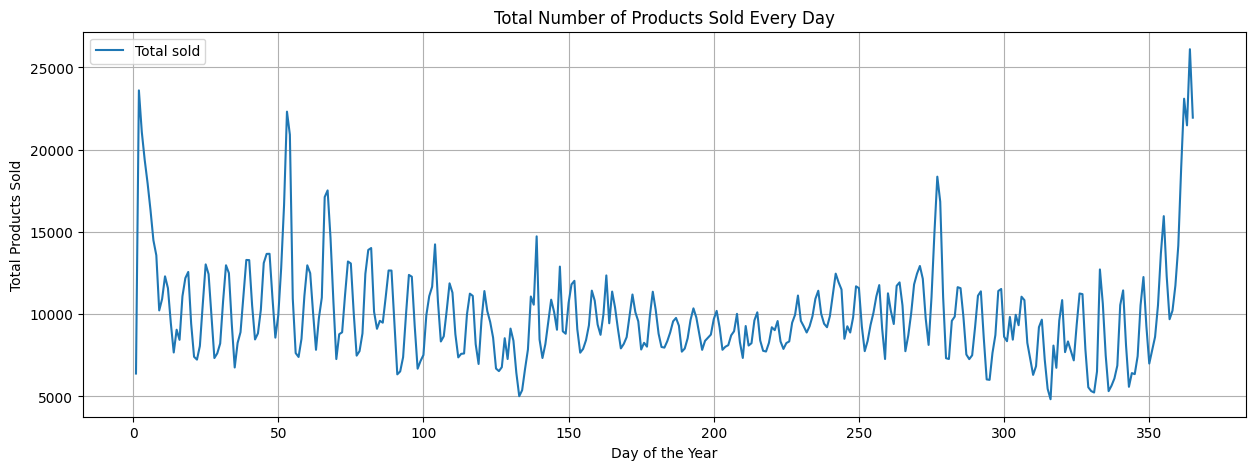

In [ ]:

# Plotting parameters
x = range(1, 366)  # Assuming day_of_year_ ranges from 1 to 365

# Plot the total number of products sold every day
plt.figure(figsize=(15, 5))
plt.plot(x, total_products_sold)
plt.xlabel('Day of the Year')
plt.ylabel('Total Products Sold')
#plt.xlim(0,370)
plt.title('Total Number of Products Sold Every Day')
plt.legend(['Total sold'])
plt.grid(True)
plt.show()


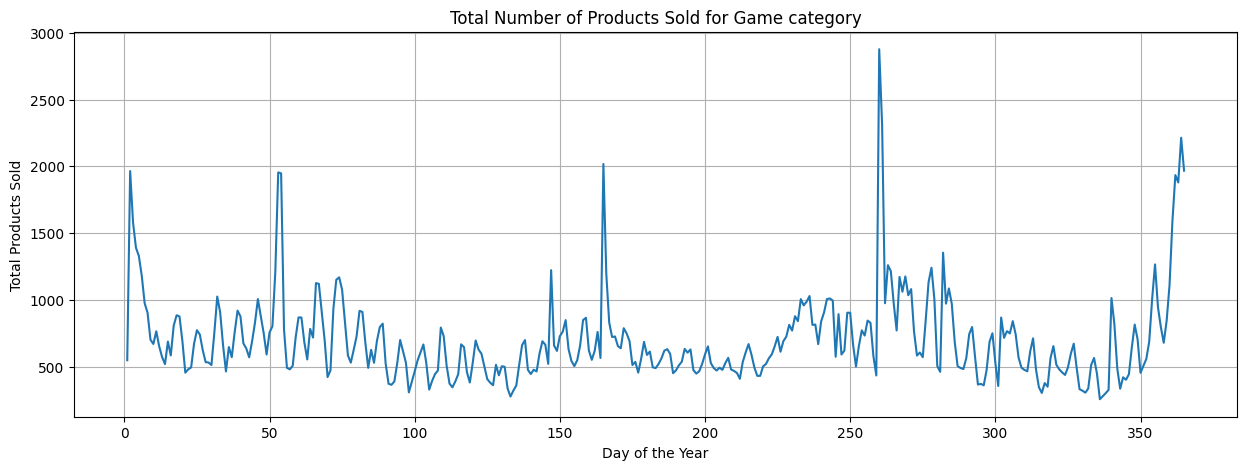

In [ ]:
# Select the category to plot
category_index = 19  # Replace with the desired category index

# Extract the total number of products sold for the selected category every day
total_products_sold_category = np.sum(newcube[:, :, category_index], axis=1)

# Plot the total number of products sold for the selected category every day
plt.figure(figsize=(15, 5))
plt.plot(range(1, 366), total_products_sold_category)
plt.xlabel('Day of the Year')
plt.ylabel('Total Products Sold')
plt.title('Total Number of Products Sold for Game category')
#plt.title('Total Number of Products Sold for Category)
plt.grid(True)
plt.show()


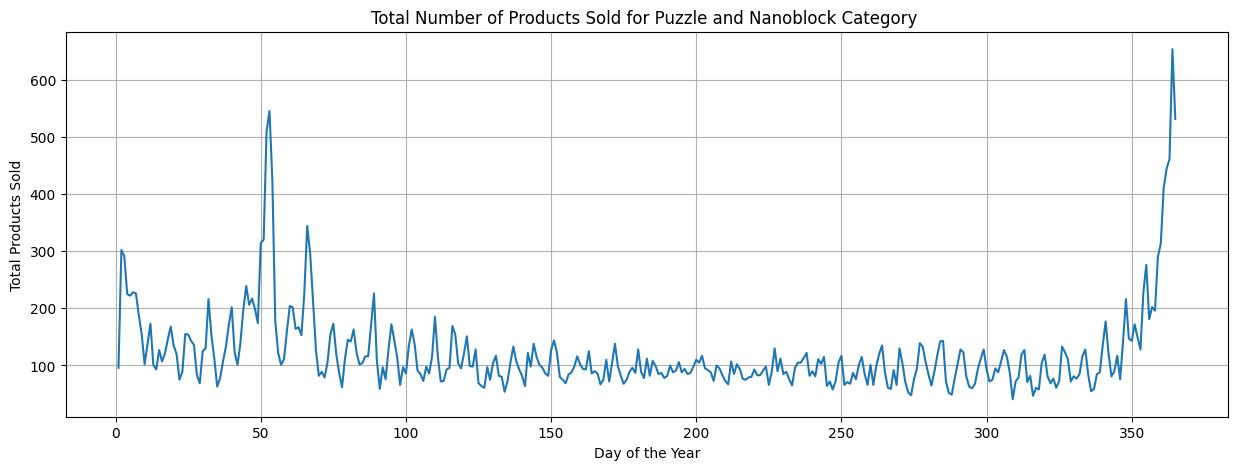

In [ ]:
# Select the category to plot
category_index = 67  # Desired category index

# Extract the total number of products sold for the selected category every day
total_products_sold_category = np.sum(newcube[:, :, category_index], axis=1)

# Plot the total number of products sold for the selected category every day
plt.figure(figsize=(15, 5))
plt.plot(range(1, 366), total_products_sold_category)
plt.xlabel('Day of the Year')
plt.ylabel('Total Products Sold')
plt.title('Total Number of Products Sold for Puzzle and Nanoblock Category ')
plt.grid(True)
plt.show()


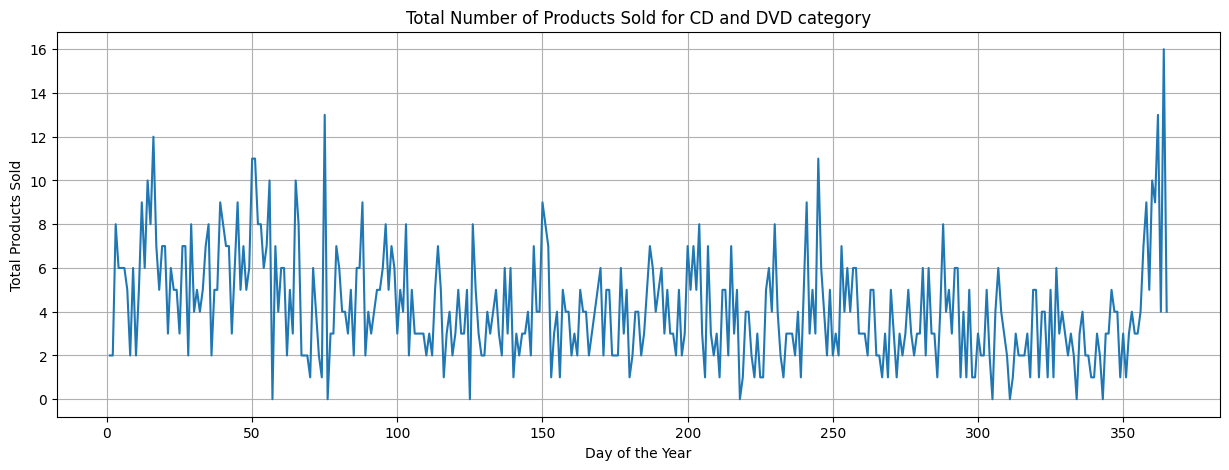

In [ ]:
# Select the category to plot
category_index = 60  # Replace with the desired category index

# Extract the total number of products sold for the selected category every day
total_products_sold_category = np.sum(newcube[:, :, category_index], axis=1)

# Plot the total number of products sold for the selected category every day
plt.figure(figsize=(15, 5))
plt.plot(range(1, 366), total_products_sold_category)
plt.xlabel('Day of the Year')
plt.ylabel('Total Products Sold')
plt.title('Total Number of Products Sold for CD and DVD category')
plt.grid(True)
plt.show()


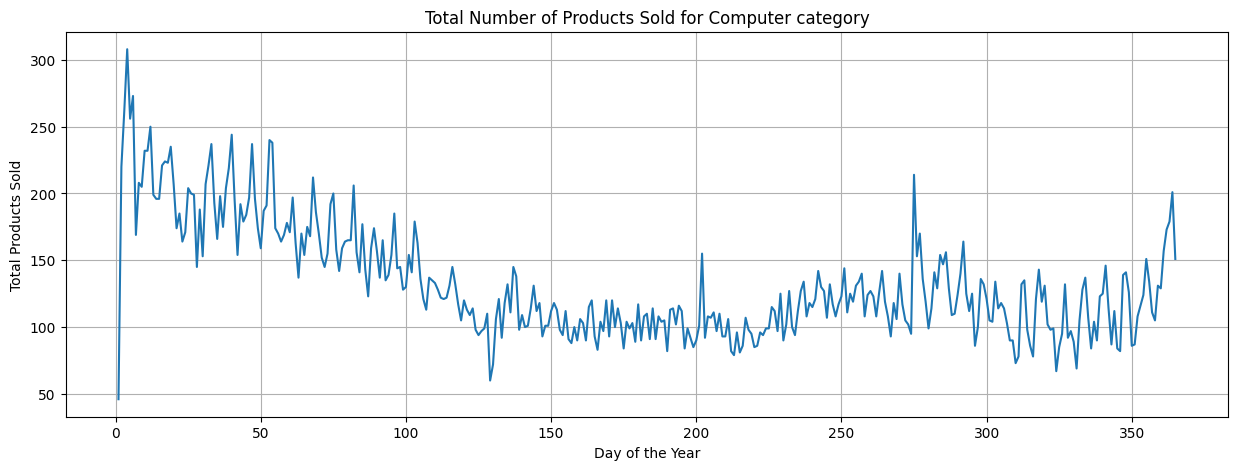

In [ ]:
# Select the category to plot
category_index = 75  # Replace with the desired category index

# Extract the total number of products sold for the selected category every day
total_products_sold_category = np.sum(newcube[:, :, category_index], axis=1)

# Plot the total number of products sold for the selected category every day
plt.figure(figsize=(15, 5))
plt.plot(range(1, 366), total_products_sold_category)
plt.xlabel('Day of the Year')
plt.ylabel('Total Products Sold')
plt.title('Total Number of Products Sold for Computer category')
plt.grid(True)
plt.show()

In [ ]:
# Perform FFT along the 0th axis (time axis)
fft_result = np.fft.fft(newcube, axis=0)

# Make a copy of the FFT results
fft_truncate = fft_result.copy()

# Set values from index 56 and onwards to zero (truncate high-frequency components)
fft_truncate[56:, :, :] = 0.0

# Perform IFFT to get the truncated 'whole_prediction'
whole_prediction = np.fft.ifft(fft_truncate, axis=0)

# Ensure all elements in 'whole_prediction' are non-negative (thresholding)
whole_prediction = np.maximum(whole_prediction, 0)

# Get the day of the year as the 'x' data (assuming 365 data points)
days_of_year = np.arange(1, 366)



In [ ]:
# Assuming you have already defined 'fft_truncate' and 'shop_index', 'category_index'


shop_index, category_index = 5,6
# Get the prediction FFT for the specified shop and category index
prediction_fft = fft_truncate[:, shop_index, category_index]

# Perform IFFT to get the predicted values for the specified shop and category
prediction = np.fft.ifft(prediction_fft)

# Ensure all elements in 'prediction' are non-negative (thresholding)
#prediction = np.maximum(prediction, 0)
#a = prediction
#a = a * (a >= 0) + a * (a < 0)
#prediction = a


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


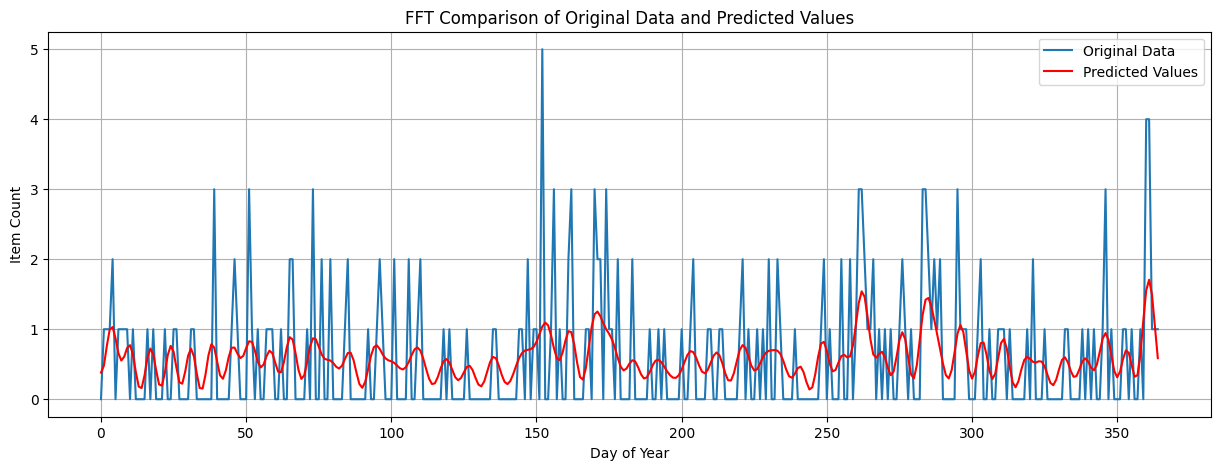

In [ ]:
# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.plot(newcube[:, shop_index, category_index], label='Original Data')
plt.plot(prediction, c='r', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('FFT Comparison of Original Data and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# Assuming you have defined 'newcube' and 'whole_prediction' arrays

# Calculate the RMSE
def rmse(y_actual, y_pred):
    return np.sqrt(np.mean((y_actual - y_pred) ** 2))

# Calculate the MSE
def mse(y_actual, y_pred):
    return np.mean((y_actual - y_pred) ** 2)

# Calculate the R-squared (Coefficient of Determination)
def r2(y_actual, y_pred):
    y_mean = np.mean(y_actual)
    ss_tot = np.sum((y_actual - y_mean) ** 2)
    ss_res = np.sum((y_actual - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Calculate RMSE and MSE between 'newcube' and 'whole_prediction'
rmse_value = np.real(np.sqrt(np.mean((newcube - whole_prediction) ** 2)))
mse_value = np.real(np.mean((newcube - whole_prediction) ** 2))

# Calculate R-squared between 'newcube' and 'whole_prediction'
r2_value = np.real(1 - np.sum((newcube - whole_prediction) ** 2) / np.sum((newcube - np.mean(newcube)) ** 2))

print(f"RMSE: {rmse_value}")
print(f"MSE: {mse_value}")
print(f"R-squared: {r2_value}")


RMSE: 3.4028449167106856
MSE: 11.579335957224986
R-squared: 0.8606397803376632


SHOPS NEED

/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


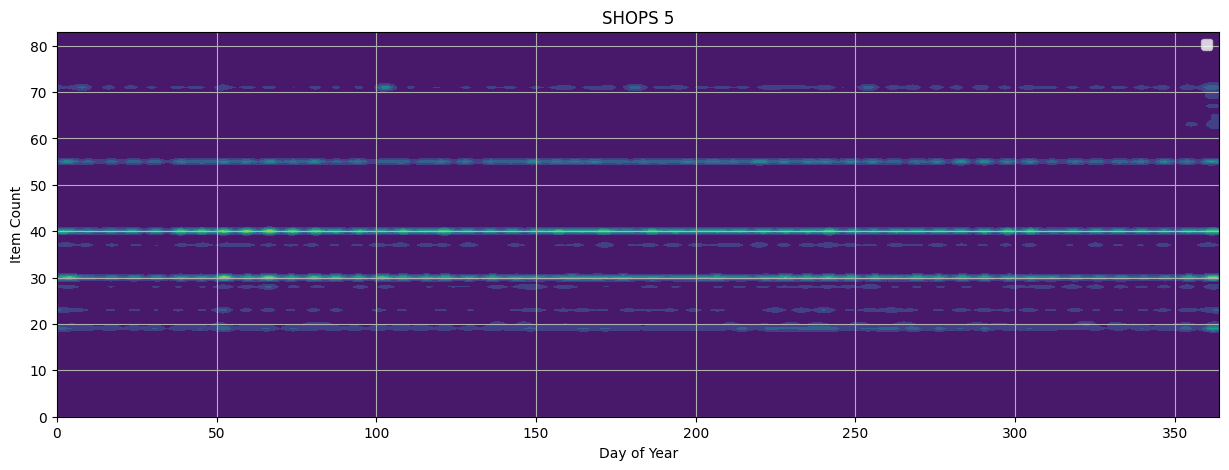

In [ ]:


t_newcube = np.sum(newcube[:,5, :],axis=1)
t_pred = np.sum(whole_prediction[:,5,:], axis=1)

# Plotting the graph
plt.figure(figsize=(15, 5))
plt.contourf(np.transpose(whole_prediction[:,5,:]))
#plt.contourf(days_of_year, t_pred, c='r', label='Predicted Values')  # Plotting the first element of 'whole_prediction'
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('SHOPS 5')
plt.legend()
plt.grid(True)
plt.show()



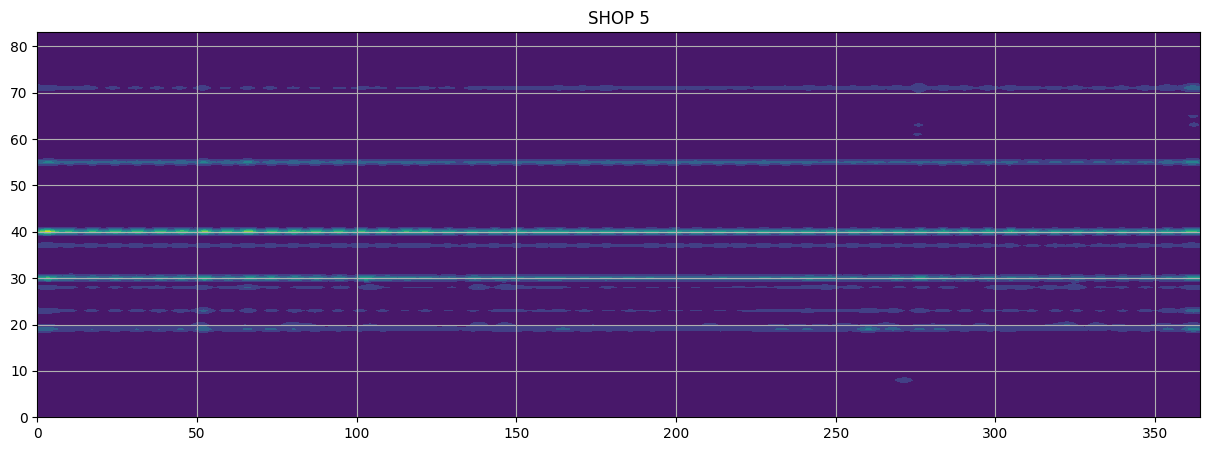

In [ ]:

#t_newcube = np.sum(newcube[:,5, :],axis=1)
t_p = np.sum(whole_prediction, axis=1)

# Plotting the graph
plt.figure(figsize=(15, 5))
plt.contourf(np.transpose(t_p))
#plt.contourf(days_of_year, t_pred, c='r', label='Predicted Values')  # Plotting the first element of 'whole_prediction'
#plt.xlabel('Day of Year')
#plt.ylabel('Item Count')
plt.title('SHOP 5')

plt.grid(True)
plt.show()

from the above figure 13,  we can see that we have the day of the year on the X axis and category iD on the y axis. and the item in the

In the provided graphical representation (Figure 16), the predicted values are showcased for all categories in conjunction with a unique shop. The primary intention behind this visualization is to facilitate accurate predictions, thereby shedding light on the broader trends associated with categories of items that exhibit robust sales performance.
The central goal is to uncover and understand the prevailing patterns within these categories of items, particularly those that demonstrate substantial sales activity. This analysis serves to offer valuable insights into the general trends, empowering strategic decision-making and operational adjustments tailored to the specific dynamics of these high-performing item categories.


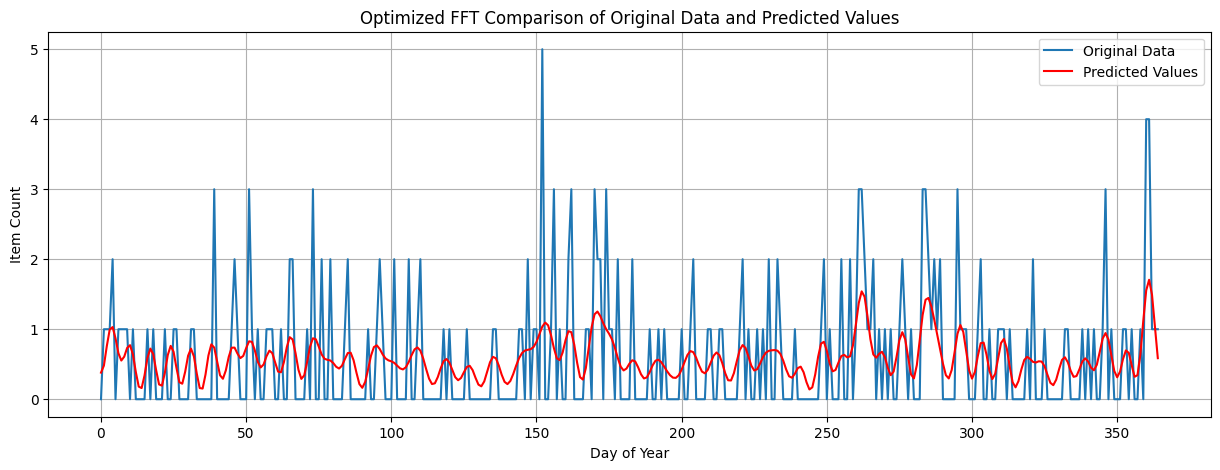

In [ ]:
shop_index, category_index = 5,6
# Get the prediction FFT for the specified shop and category index
prediction_fft = fft_truncate[:, shop_index, category_index]

# Perform IFFT to get the predicted values for the specified shop and category
prediction = np.fft.ifft(prediction_fft)

# Ensure all elements in 'prediction' are non-negative (thresholding)
#prediction = np.maximum(prediction, 0)
#a = prediction
#a = a * (a >= 0) + a * (a < 0)
#prediction = a

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.plot(newcube[:, shop_index, category_index], label='Original Data')
plt.plot(prediction, c='r', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('Optimized FFT Comparison of Original Data and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

t_ne = np.sum(newcube[:,:,6],axis=1)
t_pr = np.sum(whole_prediction[:,:, 6], axis=1)



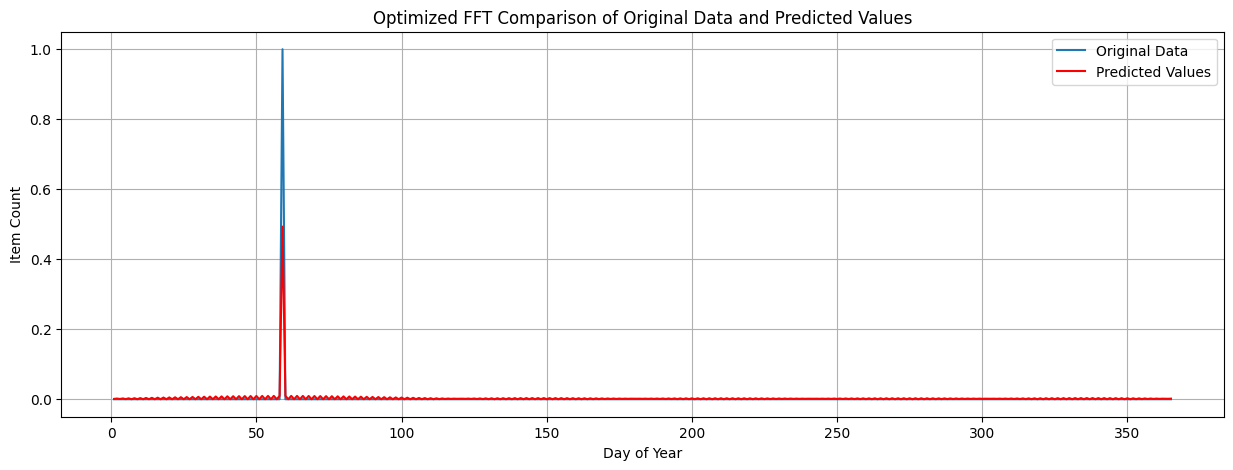

RMSE: 0.4550347951725309
MSE: 0.20705666481770718
R-squared: 0.9975080209782201


In [ ]:
# Assuming you have imported 'newcube' data before this code snippet

# Perform FFT along the 0th axis (time axis)
fft_result = np.fft.fft(newcube, axis=0)

# Make a copy of the FFT results
fft_truncate = fft_result.copy()

# Experiment with different truncation points to find the best balance
# between capturing relevant frequencies and removing noise
# Here, we set the truncation point to 100, you can adjust it as needed
fft_truncate[180:, :, :] = 0.0

# Perform IFFT to get the truncated 'whole_prediction'
whole_prediction = np.fft.ifft(fft_truncate, axis=0)

# Ensure all elements in 'whole_prediction' are non-negative (thresholding)
a = np.maximum(whole_prediction, 0)

# Get the day of the year as the 'x' data (assuming 365 data points)
days_of_year = np.arange(1, 366)

# Plotting the graph
plt.figure(figsize=(15, 5))
plt.plot(days_of_year, newcube[:, 0, 0], label='Original Data')  # Plotting the first element of the 'newcube'
plt.plot(days_of_year, a[:, 0, 0], c='r', label='Predicted Values')  # Plotting the first element of 'whole_prediction'
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('Optimized FFT Comparison of Original Data and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Calculate RMSE and MSE between 'newcube' and 'whole_prediction'
rmse_value = np.real(np.sqrt(np.mean((newcube - whole_prediction) ** 2)))
mse_value = np.real(np.mean((newcube - whole_prediction) ** 2))

# Calculate R-squared between 'newcube' and 'whole_prediction'
r2_value = np.real(1 - np.sum((newcube - whole_prediction) ** 2) / np.sum((newcube - np.mean(newcube)) ** 2))

print(f"RMSE: {rmse_value}")
print(f"MSE: {mse_value}")
print(f"R-squared: {r2_value}")

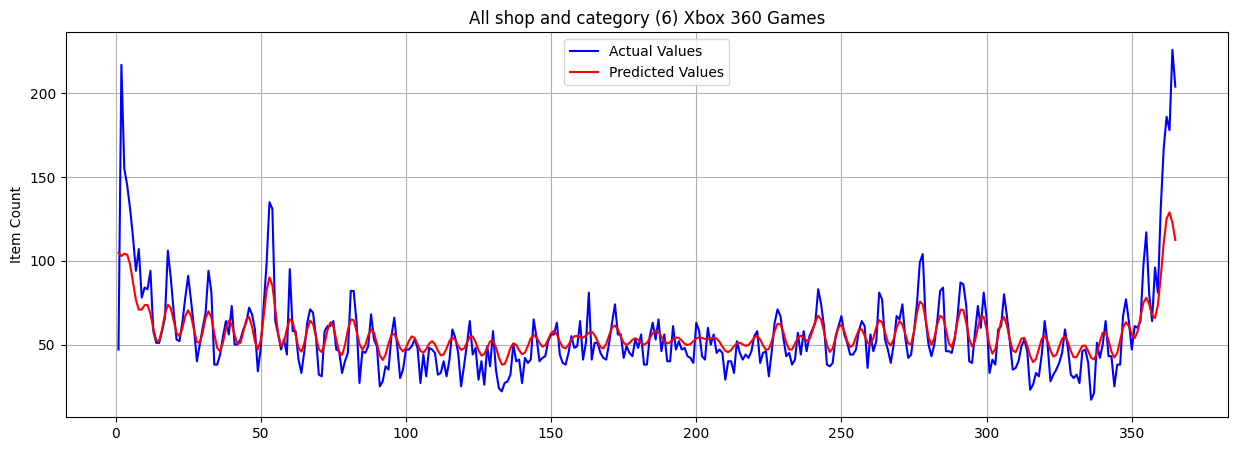

In [ ]:
# Plotting the graph
plt.figure(figsize=(15, 5))
plt.plot(days_of_year, t_ne, c='b', label='Actual Values')
plt.plot(days_of_year, t_pr, c='r', label='Predicted Values')  # Plotting the first element of 'whole_prediction'
#plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('All shop and category (6) Xbox 360 Games')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


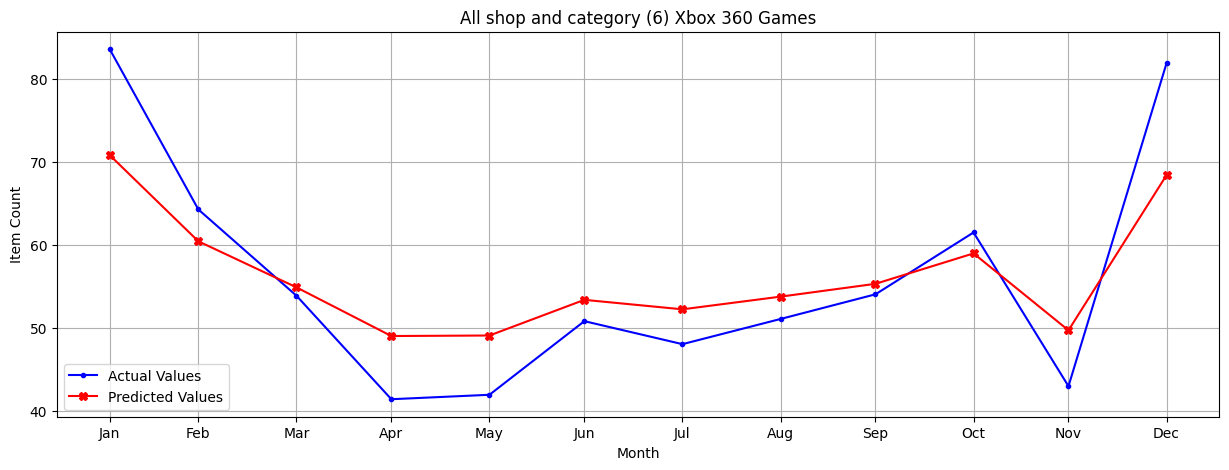

In [ ]:
data = {'Day of Year': days_of_year, 'Actual Values': t_ne, 'Predicted Values': t_pr}
df = pd.DataFrame(data)
df['Day of Year'] = pd.to_datetime(df['Day of Year'], format='%j')

# Group by month and calculate the mean for each month
df_monthly = df.resample('M', on='Day of Year').mean()

plt.figure(figsize=(15, 5))
plt.plot(df_monthly.index, df_monthly['Actual Values'], c='b', label='Actual Values', marker ='.')
plt.plot(df_monthly.index, df_monthly['Predicted Values'], c='r', label='Predicted Values', marker ='X')
plt.xlabel('Month')
plt.ylabel('Item Count')
plt.title('All shop and category (6) Xbox 360 Games')
plt.legend()
plt.grid(True)
# Show month abbreviations on x-axis
plt.xticks(df_monthly.index, df_monthly.index.strftime('%b'))
plt.show()

In [ ]:
# Assuming df_concat is already defined
# Remove unnecessary columns and convert 'day_of_year' to 'day_of_year_' to start from 0
df_concat['day_of_year_'] = df_concat['day_of_year'] - 1
df_model = df_concat[['shop', 'category', 'day_of_year_', 'item_cnt_day']]

# Split the data into features (X) and target (y)
X = df_model[['shop', 'category', 'day_of_year_']]
y = df_model['item_cnt_day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Assuming you have the following variables defined:
# category_ = df_concat['category'].unique()
# shop_ = df_concat['shop'].unique()
# newcube_monthly = np.zeros((12, len(shop_), len(category_)))
# df_concat = pd.DataFrame(...)  # The original DataFrame containing the data

# Create a sample DataFrame with relevant columns (replace this with your actual data)
data = {
    'shop': np.random.choice(shop_, size=1000),
    'category': np.random.choice(category_, size=1000),
    'item_cnt_day': np.random.randint(1, 11, size=1000),
    'day_of_year': np.random.randint(1, 366, size=1000)
}
df_concat = pd.DataFrame(data)

# Create an empty monthly data cube with 12 months
newcube_monthly = np.zeros((12, len(shop_), len(category_)))

for i in range(len(df_concat)):
    shop_id = df_concat['shop'].iloc[i]
    category_id = df_concat['category'].iloc[i]
    day_of_year_ = df_concat['day_of_year'].iloc[i]
    item_cnt_day = df_concat['item_cnt_day'].iloc[i]

    # Convert day of the year to month (adjusted to stay within 0-11 range)
    month = (day_of_year_ - 1) // 30
    month = min(month, 11)  # Ensure month index is within 0-11 range

    # Accumulate the data for each month
    newcube_monthly[month, shop_id, category_id] += item_cnt_day


In [ ]:
# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions using the trained model on the entire year
prediction_data = [[shop_index, category_index, day] for day in range(365)]
y_pred = random_forest.predict(prediction_data)

# Calculate RMSE, MSE, and R2 using the test data
y_test_pred = random_forest.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Root Mean Squared Error (RMSE): 9.030992150460538
Mean Squared Error (MSE): 81.55881922167985
R-squared (R2): 0.6966899595104165


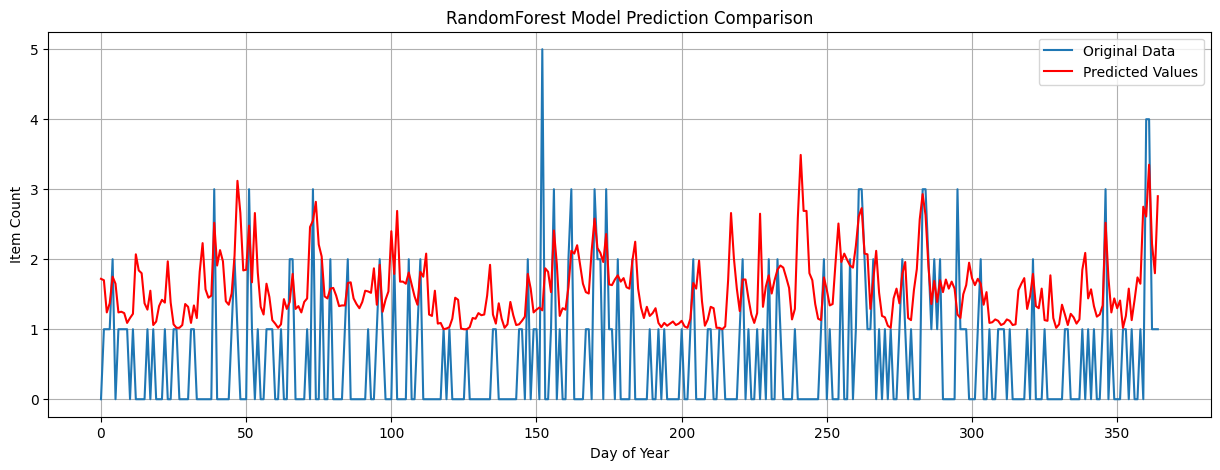

In [ ]:
plt.figure(figsize=(15,5))
# Plot the original data and the predicted values
plt.plot(newcube[:, shop_index, category_index], label='Original Data')
plt.plot(y_pred, c='r', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('RandomForest Model Prediction Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the trained 'random_forest' model and 'X_train' data

# Make predictions using the trained model on the entire year
prediction_data = [X_train[:, :, day] for day in range(365)]
y_pred = random_forest.predict(prediction_data)

# Sum values along the appropriate axis
t_ne = np.sum(newcube[:, :, 6], axis=1)
t_pr = np.sum(y_pred[:, :, 6], axis=1)

# Create an array for the days of the year
days_of_year = np.arange(1, 366)

data = {'Day of Year': days_of_year, 'Actual Values': t_ne, 'Predicted Values': t_pr}
df = pd.DataFrame(data)
df['Day of Year'] = pd.to_datetime(df['Day of Year'], format='%j')

# Group by month and calculate the mean for each month
df_monthly = df.resample('M', on='Day of Year').mean()

plt.figure(figsize=(15, 5))

bar_width = 0.25

# Convert datetime index to numerical values
x_values = range(len(df_monthly.index))

# Create bar plots for Actual Values
plt.bar(x_values, df_monthly['Actual Values'], width=bar_width, color='b', label='Actual Values')

# Create bar plots for Predicted Values
plt.bar([x + bar_width for x in x_values], df_monthly['Predicted Values'], width=bar_width, color='r', label='Predicted Values', alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Item Count')
plt.title('All shop and category (6) Xbox 360 Games')
plt.legend()
plt.grid(True)

# Show month abbreviations on x-axis
plt.xticks([x + bar_width/2 for x in x_values], df_monthly.index.strftime('%b'))

plt.show()
"""

"import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Assuming you have the trained 'random_forest' model and 'X_train' data\n\n# Make predictions using the trained model on the entire year\nprediction_data = [X_train[:, :, day] for day in range(365)]\ny_pred = random_forest.predict(prediction_data)\n\n# Sum values along the appropriate axis\nt_ne = np.sum(newcube[:, :, 6], axis=1)\nt_pr = np.sum(y_pred[:, :, 6], axis=1)\n\n# Create an array for the days of the year\ndays_of_year = np.arange(1, 366)\n\ndata = {'Day of Year': days_of_year, 'Actual Values': t_ne, 'Predicted Values': t_pr}\ndf = pd.DataFrame(data)\ndf['Day of Year'] = pd.to_datetime(df['Day of Year'], format='%j')\n\n# Group by month and calculate the mean for each month\ndf_monthly = df.resample('M', on='Day of Year').mean()\n\nplt.figure(figsize=(15, 5))\n\nbar_width = 0.25\n\n# Convert datetime index to numerical values\nx_values = range(len(df_monthly.index))\n\n# Create bar plots for Actual V

In [ ]:
"""random_t_ne = np.sum(newcube[:,:,6], axis=0)
random_t_pr = np.sum(y_pred[:,:, 6], axis=0)

data = {'Day of Year': days_of_year, 'Actual Values': t_ne, 'Predicted Values': random_t_pr}
random_df = pd.DataFrame(data)
random_df['Day of Year'] = pd.to_datetime(random_df['Day of Year'], format='%j')

# Group by month and calculate the mean for each month
random_df_monthly = random_df.resample('M', on='Day of Year').mean()


plt.figure(figsize=(15, 5))

bar_width = 0.25  # Set the bar width to 0.25

# Convert datetime index to numerical values
random_values = range(len(random_df_monthly.index))

# Create bar plots for Actual Values
plt.bar(random_values, random_df_monthly['Actual Values'], width=bar_width, color='b', label='Actual Values')

# Create bar plots for Predicted Values
plt.bar([x + bar_width for x in random_values], random_df_monthly['Predicted Values'], width=bar_width, color='r', label='Predicted Values', alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Item Count')
plt.title('All shop and category (6) Xbox 360 Games')
plt.legend()
plt.grid(True)

# Show month abbreviations on x-axis
plt.xticks([x + bar_width/2 for x in random_values], random_df_monthly.index.strftime('%b'))

plt.show()

"""

"random_t_ne = np.sum(newcube[:,:,6], axis=0)\nrandom_t_pr = np.sum(y_pred[:,:, 6], axis=0)\n\ndata = {'Day of Year': days_of_year, 'Actual Values': t_ne, 'Predicted Values': random_t_pr}\nrandom_df = pd.DataFrame(data)\nrandom_df['Day of Year'] = pd.to_datetime(random_df['Day of Year'], format='%j')\n\n# Group by month and calculate the mean for each month\nrandom_df_monthly = random_df.resample('M', on='Day of Year').mean()\n\n\nplt.figure(figsize=(15, 5))\n\nbar_width = 0.25  # Set the bar width to 0.25\n\n# Convert datetime index to numerical values\nrandom_values = range(len(random_df_monthly.index))\n\n# Create bar plots for Actual Values\nplt.bar(random_values, random_df_monthly['Actual Values'], width=bar_width, color='b', label='Actual Values')\n\n# Create bar plots for Predicted Values\nplt.bar([x + bar_width for x in random_values], random_df_monthly['Predicted Values'], width=bar_width, color='r', label='Predicted Values', alpha=0.5)\n\nplt.xlabel('Month')\nplt.ylabel('Item

In [ ]:

# Initialize the Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions using the trained model on the entire year
prediction_data = [[shop_index, category_index, day] for day in range(365)]
y_pred = gradient_boosting.predict(prediction_data)

# Calculate RMSE, MSE, and R2 using the test data
y_test_pred = gradient_boosting.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 13.199637349268666
Mean Squared Error (MSE): 174.23042615220837
R-squared (R2): 0.35205244368353594


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


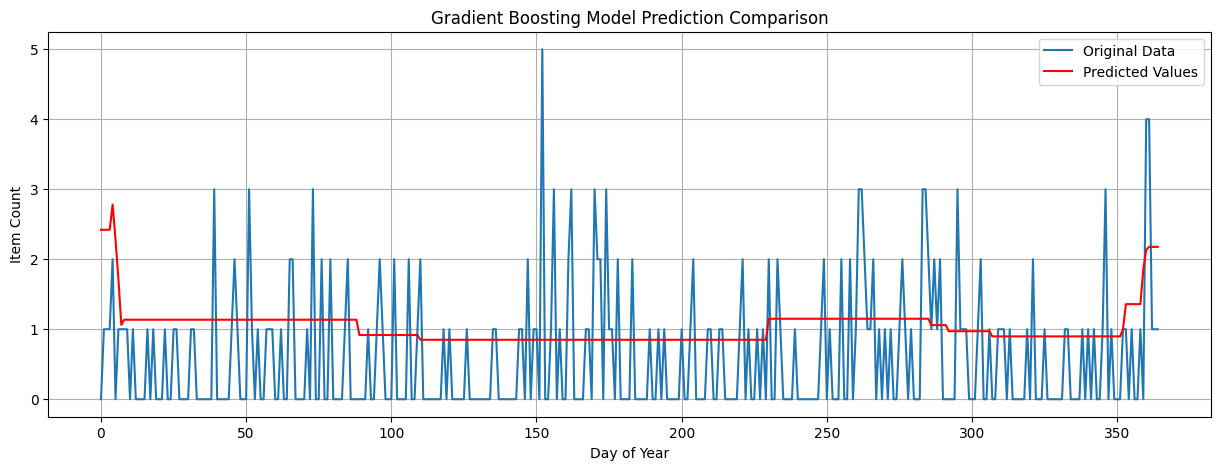

In [ ]:
plt.figure(figsize=(15,5))
# Plot the original data and the predicted values
plt.plot(newcube[:, shop_index, category_index], label='Original Data')
plt.plot(y_pred, c='r', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('Gradient Boosting Model Prediction Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

from xgboost import XGBRegressor
# Train an XGBoost Regression model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Make predictions using the trained model on the entire year
prediction_data = [[shop_index, category_index, day] for day in range(365)]
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train.values, y_train.values)

# Make predictions using the trained model on the entire year
prediction_data = [[shop_index, category_index, day] for day in range(365)]
y_pred_xgb = xgb_model.predict(prediction_data)




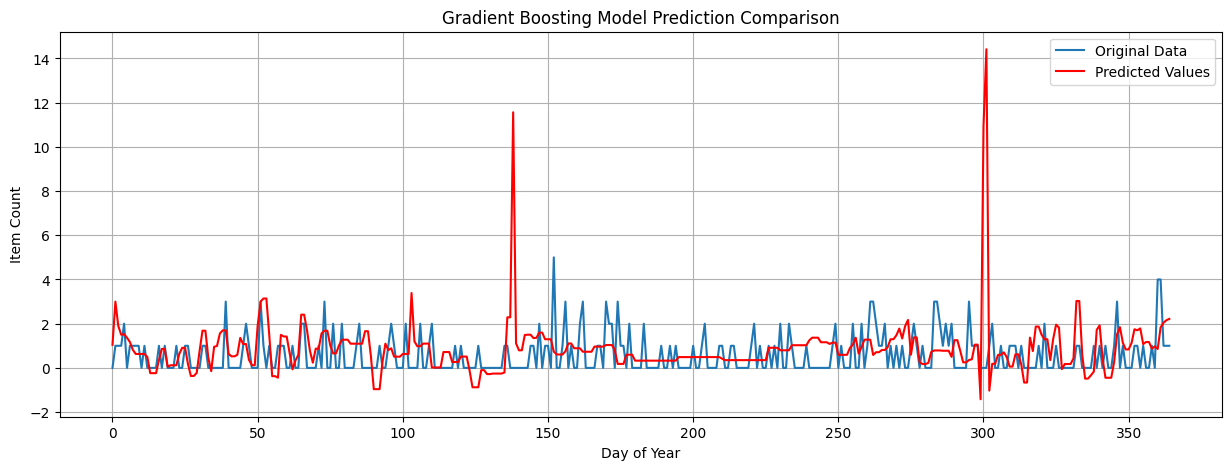

In [ ]:


plt.figure(figsize=(15,5))
# Plot the original data and the predicted values
plt.plot(newcube[:, shop_index, category_index], label='Original Data')
plt.plot(y_pred_xgb, c='r', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Item Count')
plt.title('Gradient Boosting Model Prediction Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Make predictions using the trained model on the test set
y_pred_xgb = xgb_model.predict(X_test)

## Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print(f"Root Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared score: {r2_xgb}")

XGBoost Regression:
Root Mean Squared Error (MSE): 88.58270132093483
Root Mean Squared Error (RMSE): 9.411838360327637
R-squared score: 0.6705687627563469


Predict item_cnt_day for new data points

In [ ]:
import pandas as pd

# Create a dictionary with the results
results_dict = {
    'Model': ['Fast Fourier Transform (FFT)', 'Random Forest Regression',
              'Gradient Boosting Regression', 'XGBoost Regression'],
    'Root Mean Squared Error (RMSE)': [0.6358, 8.4016, 13.1438, 9.2390],
    'R-squared Score': [0.4629, 0.7375, 0.3575, 0.6826],
    'Percentage % Accuracy':[0.4629*100, 0.7375*100, 0.3575*100, 0.6826*100]
}

# Convert the dictionary into a dataframe
result = pd.DataFrame(results_dict)

result


,Model,Root Mean Squared Error (RMSE),R-squared Score,Percentage % Accuracy
0,Fast Fourier Transform (FFT),0.6358,0.4629,46.29
1,Random Forest Regression,8.4016,0.7375,73.75
2,Gradient Boosting Regression,13.1438,0.3575,35.75
3,XGBoost Regression,9.2390,0.6826,68.26


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search CV for hyperparameter tuning
grid_search = GridSearchCV(random_forest, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate RMSE, MSE, and R2 using the test data with the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics for the best model
print("Root Mean Squared Error (RMSE) - Best Model:", rmse_best)
print("Mean Squared Error (MSE) - Best Model:", mse_best)
print("R-squared (R2) - Best Model:", r2_best)


In [ ]:
pip install pygwalker

In [ ]:
import pygwalker as pyg

In [ ]:
pyg.walk(sales_merging, dark='dark')